## 10. BJT Fundamentals
### 10.1 Terminology
### 10.2 Fabrication
### 10.3 Electrostatics
#### Exercise 10.1, 10.2 appendix M
pnp bipolar transister, NAE=1e18, NDB=1e16, NAC=1e15, WB=1e-4
### 10.4 Introducotry operational considerations
### 10.5 Performace parameters
#### Emitter efficiency
#### Common Emitter dc current gain
### 10.6 Summary

-0.8333377813458471


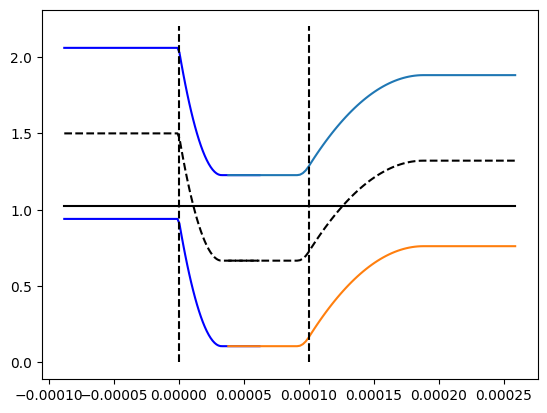

In [132]:
# Appendix M, page 771
# BJT equilibrium energy band diagram generator
from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni,mun,mup,resistancep
import numpy as np, matplotlib.pyplot as plt

Doping=[1e18, -1e16, 1e15] #E,B,C type and doping concentrations( - = ntype)
WB=1e-4 #base width

T=300; k=8.617e-5; e0=8.85e-14; q=1.602e-19; KS=11.8; ni=1e10; EG=1.12
NE=Doping[0]; NB=Doping[1]; NC=Doping[2] # doping and type
sE=np.sign(NB); sB=np.sign(NB); sC=np.sign(NC)
NE=np.abs(NE); NB=np.abs(NB); NC=np.abs(NC) # doping

#Vbi
Ei_emitter=[(sE*k*T*np.log(NE/ni)),(sB*k*T*np.log(NB/ni))]
Ei_collector=[(sB*k*T*np.log(NB/ni)),(-sC*k*T*np.log(NC/ni))]
Vbi=[(np.sum(Ei_emitter)),(np.sum(Ei_collector))]
svbi=np.sign(Vbi)
Vbi=np.abs(Vbi)
#print(Vbi)

# Depletion width
xE=np.sqrt(2*KS*e0/q*NB*Vbi[0]/(NE*(NB+NE)))
xBeb=np.sqrt(2*KS*e0/q*NE*Vbi[0]/(NB*(NE+NB)))
xBcb=np.sqrt(2*KS*e0/q*NC*Vbi[1]/(NB*(NC+NB)))
xC=np.sqrt(2*KS*e0/q*NB*Vbi[1]/(NC*(NB+NC)))
W=WB-xBeb-xBcb
#print(xE, xBeb, xBcb, xC, W)

if W<0: error("For the given doping and WB, the base is totally depleted")
elif(xC>xE): HIGH_X=1.5; LOW_X=xC/xE
else: HIGH_X=xE/xC; LOW_X=1.5

VMAX=3

# EB Junction
xlft=-LOW_X*xE
xrght=xBeb+W/2

x=np.linspace(xlft,xrght,101)
sVx=-svbi[0]*sE*sB
Vx1=sVx*(Vbi[0]-q*NB*(xBeb-x)**2/(2*KS*e0)*(x<=xBeb))*(x>=0)
Vx2=sVx*0.5*q*NE*(xE+x)**2/(KS*e0)*np.logical_and(x>=-xE, x<0)
Vx=Vx1+Vx2
#print("Vx1:",Vx1)

EF=Vx[0]+VMAX/2+sE*k*T*np.log(NE/ni)
Ec=-Vx+EG/2+VMAX/2
Ev=-Vx-EG/2+VMAX/2
Ei=-Vx+VMAX/2

LEc=Ec[0]
LEv=Ev[0]
LEi=Ei[0]

plt.plot(x,Ec,'b-')
plt.plot(x,Ev,'b-')
plt.plot(x,Ei,'k--')
plt.plot([xlft,0],[EF,EF],'k-')
plt.plot([0,0],[0, VMAX-0.8],'k--')

# CB Junction
xlft=-xBeb-W/2
xrght=HIGH_X*xC*1.2

x=np.linspace(xlft,xrght,101)
sVx=-svbi[1]*sC*sB
Vx1=sVx*(Vbi[1]-q*NC*(xC-x)**2/(2*KS*e0)*(x<=xC))*(x>=0)
Vx2=sVx*0.5*q*NB*(xBcb+x)**2/(KS*e0)*np.logical_and(x>=-xBcb, x<0)
Vx=Vx1+Vx2

OFFSET=(Ec[-1])-(-Vx[0]+EG/2+VMAX/2)
print(OFFSET)
Ec=(-Vx+EG/2+VMAX/2)+OFFSET
Ev=(-Vx-EG/2+VMAX/2)+OFFSET
Ei=(-Vx+VMAX/2)+OFFSET
x=x+WB
plt.plot(x,Ec)
plt.plot(x,Ev)
plt.plot(x,Ei,'k--')
plt.plot([0, xrght+WB],[EF,EF],'k-')
plt.plot([WB,WB],[0, VMAX-0.8],'k--')
plt.show()


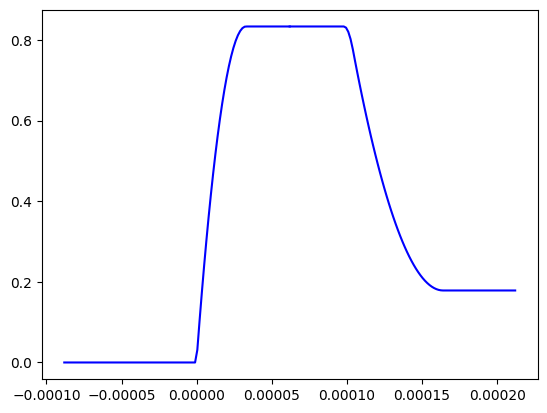

In [131]:
# Appendix M, page 771
# BJT equilibrium energy band diagram generator
from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni,mun,mup,resistancep
import numpy as np, matplotlib.pyplot as plt

Doping=[1e18, -1e16, 1e15] #E,B,C type and doping concentrations( - = ntype)
WB=1e-4 #base width

T=300; k=8.617e-5; e0=8.85e-14; q=1.602e-19; KS=11.8; ni=1e10; EG=1.12
NE=Doping[0]; NB=Doping[1]; NC=Doping[2] # doping and type
sE=np.sign(NB); sB=np.sign(NB); sC=np.sign(NC)
NE=np.abs(NE); NB=np.abs(NB); NC=np.abs(NC) # doping

#Vbi
Ei_emitter=[(sE*k*T*np.log(NE/ni)),(sB*k*T*np.log(NB/ni))]
Ei_collector=[(sB*k*T*np.log(NB/ni)),(-sC*k*T*np.log(NC/ni))]
Vbi=[(np.sum(Ei_emitter)),(np.sum(Ei_collector))]
svbi=np.sign(Vbi)
Vbi=np.abs(Vbi)
#print(Vbi)

# Depletion width
xE=np.sqrt(2*KS*e0/q*NB*Vbi[0]/(NE*(NB+NE)))
xBeb=np.sqrt(2*KS*e0/q*NE*Vbi[0]/(NB*(NE+NB)))
xBcb=np.sqrt(2*KS*e0/q*NC*Vbi[1]/(NB*(NC+NB)))
xC=np.sqrt(2*KS*e0/q*NB*Vbi[1]/(NC*(NB+NC)))
W=WB-xBeb-xBcb
#print(xE, xBeb, xBcb, xC, W)

if W<0: error("For the given doping and WB, the base is totally depleted")
elif(xC>xE): HIGH_X=1.5; LOW_X=xC/xE
else: HIGH_X=xE/xC; LOW_X=1.5

# EB Junction
xlft=-LOW_X*xE
xrght=xBeb+W/2

xeb=np.linspace(xlft,xrght,101)
sVx=-svbi[0]*sE*sB
Vx1=sVx*(Vbi[0]-q*NB*(xBeb-xeb)**2/(2*KS*e0)*(xeb<=xBeb))*(xeb>=0)
Vx2=sVx*0.5*q*NE*(xE+xeb)**2/(KS*e0)*np.logical_and(xeb>=-xE, xeb<0)
Vxeb=Vx1+Vx2

# CB Junction
xlft=-xBeb-W/2
xrght=HIGH_X*xC*1.2

xbc=np.linspace(xlft,xrght,101)
sVx=-svbi[1]*sC*sB
Vx1=sVx*(Vbi[1]-q*NC*(xC-xbc)**2/(2*KS*e0)*(xbc<=xC))*(xbc>=0)
Vx2=sVx*0.5*q*NB*(xBcb+xbc)**2/(KS*e0)*np.logical_and(xbc>=-xBcb, xbc<0)
Vxbc=Vx1+Vx2

xbc=xeb+WB*1.5
#xbc+=2*xBeb+2*W+xbc

plt.plot(xeb,Vxeb,'b-')
plt.plot(xbc,Vxbc+Vxeb[-1],'b-')
plt.show()

In [74]:
# problem 3a
import numpy as np

# Defining Constants
k = 8.617e-5  # Boltzmann constant (eV/K)
T = 300  # Temperature in K
e0 = 8.85e-14  # Vacuum permittivity (F/cm)
q = 1.602e-19  # Elementary charge (C)
Ks = 11.8  # Relative permittivity
ni = 1.0e10  # Intrinsic carrier concentration (per cm^3)

# Given Parameters and Values
Wb = 2e-4  # Base width (cm)
A = 1e-4  # Area (cm^2)
Ne = 1.0e18  # Donor concentration (per cm^3)
Nb = 1.0e16  # Base concentration (per cm^3)
Nc = 1.0e15  # Acceptor concentration (per cm^3)
Veb = 0.7  # Base-emitter voltage (V)
Vcb = -5  # Collector-base voltage (V)

# Depletion Region Lengths (Equilibrium)
Vbieb = (k * T) * np.log(Ne * Nb / ni**2)  # Base-emitter built-in voltage
W_eb = (2 * Ks * e0 / q) * ((Ne + Nb) / (Ne * Nb)) * Vbieb
Web = np.sqrt(W_eb)
print(f"EB depletion length is {Web:.2e} cm")

Vbicb = (k * T) * np.log(Nc * Nb / ni**2)  # Collector-base built-in voltage
W_cb = (2 * Ks * e0 / q) * ((Nc + Nb) / (Nc * Nb)) * Vbicb
Wcb = np.sqrt(W_cb)
print(f"CB depletion length is {Wcb:.2e} cm")

# Depletion Region Lengths (Under Bias)
W_eb = (2 * Ks * e0 / q) * ((Ne + Nb) / (Ne * Nb)) * (Vbieb - Veb)
Web = np.sqrt(W_eb)
print(f"EB depletion length under bias is {Web:.2e} cm")

W_cb = (2 * Ks * e0 / q) * ((Nc + Nb) / (Nc * Nb)) * (Vbicb - Vcb)
Wcb = np.sqrt(W_cb)
print(f"CB depletion length under bias is {Wcb:.2e} cm")


EB depletion length is 3.31e-05 cm
CB depletion length is 9.69e-05 cm
EB depletion length under bias is 1.33e-05 cm
CB depletion length under bias is 2.85e-04 cm


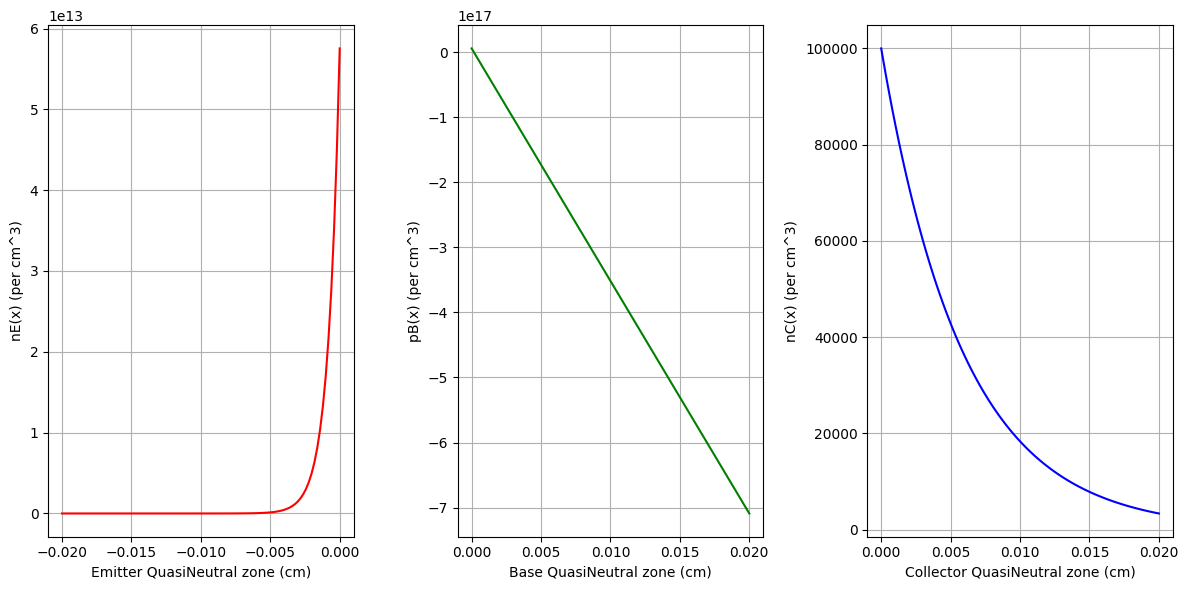

In [6]:
# problem 3b
import numpy as np
import matplotlib.pyplot as plt

# Defining Constants
k = 8.617e-5  # Boltzmann constant (eV/K)
T = 300  # Temperature in K
e0 = 8.85e-14  # Vacuum permittivity (F/cm)
q = 1.602e-19  # Elementary charge (C)
Ks = 11.8  # Relative permittivity
ni = 1.0e10  # Intrinsic carrier concentration (per cm^3)

# Given Parameters
Wb = 2e-4  # Base width (cm)
A = 1e-4  # Area (cm^2)
Ne = 1.0e18  # Donor concentration (per cm^3)
Nb = 1.0e16  # Base concentration (per cm^3)
Nc = 1.0e15  # Acceptor concentration (per cm^3)
De = 6.81  # Diffusion coefficient for electrons (cm^2/s)
Db = 11.3  # Diffusion coefficient for holes (cm^2/s)
Dc = 34.8  # Diffusion coefficient for holes (cm^2/s)
Le = 8.25e-4  # Diffusion length for electrons (cm)
Lb = 3.36e-3  # Diffusion length for holes in base (cm)
Lc = 5.9e-3  # Diffusion length for holes in collector (cm)
Veb = 0.7  # Base-emitter voltage (V)
Vcb = -5  # Collector-base voltage (V)
ne0 = ni**2 / Ne  # Minority carrier concentration in emitter
pb0 = ni**2 / Nb  # Minority carrier concentration in base
nc0 = ni**2 / Nc  # Minority carrier concentration in collector
Vbieb = (k * T) * np.log(Ne * Nb / ni**2)  # Base-emitter built-in voltage
Vbicb = (k * T) * np.log(Nc * Nb / ni**2)  # Collector-base built-in voltage

# Effective Base Width (W)
x_eb = (2 * Ks * e0 / q) * (Ne / (Nb * (Ne + Nb))) * (Vbieb - Veb)
xeb = np.sqrt(x_eb)

x_cb = (2 * Ks * e0 / q) * (Nc / (Nb * (Nc + Nb))) * (Vbicb - Vcb)
xcb = np.sqrt(x_cb)

W = Wb - xeb - xcb

# Minority Carrier Concentration in Quasi-Neutral Regions
x = np.linspace(0, 0.02, 100)
ne = ne0 * (np.exp(Veb / (k * T)) - 1) * np.exp(-x / Le)
nc = nc0 * (np.exp(Vcb / (k * T)) - 1) * np.exp(-x / Lc)
dpb0 = pb0 * (np.exp(Veb / (k * T)) - 1)
dpbw = pb0 * (np.exp(Vcb / (k * T)) - 1)
pb = dpb0 + (dpbw - dpb0) * (x / W)

# Plotting
fig, axs = plt.subplots(1, 3, figsize=(12, 6))

# Plotting the emitter quasi-neutral zone
axs[0].plot(-x, ne, 'r-')
axs[0].grid(True)
axs[0].set_xlabel('Emitter QuasiNeutral zone (cm)')
axs[0].set_ylabel('nE(x) (per cm^3)')

# Plotting the base quasi-neutral zone
axs[1].plot(x, pb, 'g-')
axs[1].grid(True)
axs[1].set_xlabel('Base QuasiNeutral zone (cm)')
axs[1].set_ylabel('pB(x) (per cm^3)')

# Plotting the collector quasi-neutral zone
axs[2].plot(x, -nc, 'b-')
axs[2].grid(True)
axs[2].set_xlabel('Collector QuasiNeutral zone (cm)')
axs[2].set_ylabel('nC(x) (per cm^3)')

plt.tight_layout()
plt.show()


In [87]:
# problem 3c
import numpy as np

# Defining Constants
k = 8.617e-5  # Boltzmann constant in eV/K
T = 300       # Temperature in K
e0 = 8.85e-14 # Vacuum permittivity in F/cm
q = 1.602e-19 # Charge of electron in C
Ks = 11.8     # Relative permittivity
ni = 1.0e10   # Intrinsic carrier concentration

# Given Parameters
Wb = 2e-4
A = 1e-4
Ne = 1.0e18
Nb = 1.0e16
Nc = 1.0e15
De = 6.81
Db = 11.3
Dc = 34.8
Le = 8.25e-4
Lb = 3.36e-3
Lc = 5.9e-3
Veb = 0.7
Vcb = -5
ne0 = ni**2 / Ne
pb0 = ni**2 / Nb
nc0 = ni**2 / Nc

# Calculate the built-in potentials
Vbieb = (k * T) * np.log(Ne * Nb / ni**2)
Vbicb = (k * T) * np.log(Nc * Nb / ni**2)

# Display the results
print(f"Vbieb: {Vbieb} V")
print(f"Vbicb: {Vbicb} V")


Vbieb: 0.833337781345847 V
Vbicb: 0.6547653996288798 V
